In [1]:
import numpy as np

In [2]:
# 問題1

dice = range(1, 7)
print("{}の的が選ばれました".format(np.random.choice(dice)))

2の的が選ばれました


In [3]:
# 問題2 関数

def throw_darts_for_p2(n_of_throws):
    # サイコロ
    dice = range(1, 7)
    # 結果格納用
    result = np.empty(shape=[0, 2])
    for _ in range(n_of_throws):
        mean = [np.random.choice(dice), 0]
        cov = [[0.01,0], [0,0.01]]
        result = np.append(result, [list(np.random.multivariate_normal(mean, cov))], axis=0)

    return result

In [4]:
# 問題2 サンプル実行
print(throw_darts_for_p2(5))

[[ 5.09371842 -0.06211742]
 [ 4.9753341   0.18842386]
 [ 5.97415885 -0.15439047]
 [ 5.77046105 -0.03589208]
 [ 3.11403217  0.21388089]]


In [5]:
# 問題3 関数
def throw_darts_for_p3(n_of_throws):
    # サイコロ
    dice = range(1, 7)
    # 結果格納用
    result = {key: [] for key in list(dice)}

    for _ in range(n_of_throws):
        dice_splot = np.random.choice(dice)
        mean = [dice_splot, 0]
        cov = [[0.01,0], [0,0.01]]
        result[dice_splot].append(list(np.random.multivariate_normal(mean, cov)))

    return result

In [6]:
# 問題3 サンプル実行
print(throw_darts_for_p3(10))

{1: [[1.1046750342574234, 0.07911355042248525], [1.0163201119423784, -0.08662328014599946], [0.8970602950278135, 0.0016852760146180677]], 2: [[1.8601544620137394, -0.13695698799565215]], 3: [[3.065376349040327, 0.06419138862193996]], 4: [[4.050952635442439, -0.08033757958336085], [4.140628843191874, 0.0022130656460176436]], 5: [[5.05013836996943, -0.18804721331668547], [4.892039075671605, -0.09372244799087528]], 6: [[5.93926688719068, -0.004448101442526563]]}


In [7]:
# 問題5 関数

import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# 的の円のplot作成
def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

# ターゲットをサイコロで決めて、ターゲットに対して当たった箇所をdictに記録し結果を返す変数
def throw_darts_for_p4(n_of_target, n_of_throws):
    # 引数により可変のサイコロ
    dice = range(1, n_of_target + 1)
    # 結果格納用
    result = {key: [] for key in list(dice)}

    for _ in range(n_of_throws):
        dice_splot = np.random.choice(dice)
        # ダーツの腕前は、標準偏差 0.1の正規分布に基づく
        mean = [dice_splot, 0]
        cov = [[0.01,0], [0,0.01]]
        result[dice_splot].append(list(np.random.multivariate_normal(mean, cov)))

    return result

# ダーツをして結果を描写するまでの関数
def play_darts(n_of_target, n_of_throws):
    Path = mpath.Path

    fig, ax = plt.subplots()

    # 的の枠作成 (大枠、中枠、小枠の3つ)
    inside_vertices = make_circle(0.1)
    middle_vertices = make_circle(0.3)
    outside_vertices = make_circle(0.5)
    codes = np.ones(
        len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
    codes[0] = mpath.Path.MOVETO

    for i in range(n_of_target):
        vertices = np.concatenate((outside_vertices[::1], middle_vertices[::1], inside_vertices[::1]))
        # targetの中心に来るようにずらす
        vertices[:, 0] += i * 1 + 1
        all_codes = np.concatenate((codes, codes, codes))
        path = mpath.Path(vertices, all_codes)
        # 枠をplot
        patch = mpatches.PathPatch(path, edgecolor='black', fill=False)
        # グラフに追加
        ax.add_patch(patch)

    ax.set_title('darts')
    ax.set_aspect(1.0)
    fig.set_size_inches(20, 10)

    # ダーツをして刺さった箇所をplot
    for _, spots in throw_darts_for_p4(n_of_target, n_of_throws).items():
        if spots:
            ax.scatter(np.array(spots)[:,0], np.array(spots)[:,1])

    plt.show()

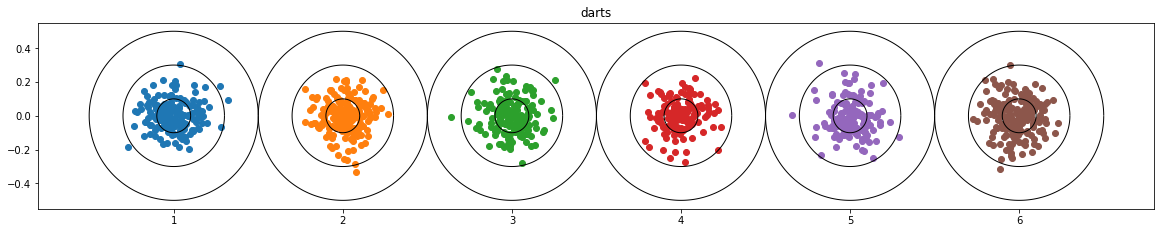

In [8]:
# 課題 4
play_darts(6, 1000)

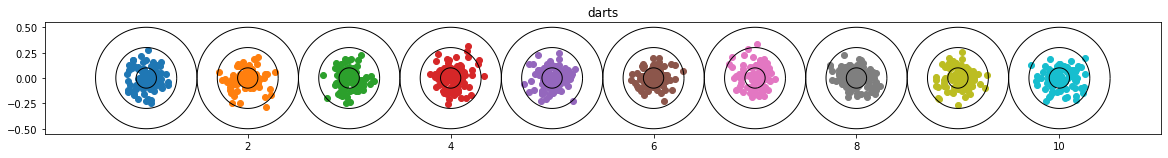

In [9]:
# 課題 5 サンプル
play_darts(10, 1000)